In [2096]:
import pandas as pd
import numpy as np
from keras.api.models import Sequential
from keras.api.layers import Dense, Input
from keras.api.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2097]:
# Carregar os dados
data = pd.read_csv("sinais_vitais.txt", header=None)

In [2098]:
# Seleção de variáveis preditoras e alvos
X = data.iloc[:, [3, 4, 5]].values  # si3 (qualidade da pressão), si4 (pulso), si5 (respiração)
y_gravity = data.iloc[:, -2].values  # Gravidade contínua
y_labels = data.iloc[:, -1].values  # Rótulo de saída

In [2099]:
# Normalização
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])  # Exibindo os primeiros 5 dados para verificar


[[ 1.17077456 -0.43688246  1.71800663]
 [ 1.2310783  -0.64616134  1.4125891 ]
 [-0.47109735  1.65960919  1.30529787]
 [ 1.23253022  0.73357825  1.07831656]
 [-0.13018468 -0.32080258  0.21592273]]


In [ ]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test, y_train_labels, y_test_labels = train_test_split(
    X_normalized, y_gravity, y_labels, test_size=0.2, shuffle=True
)

print(X_train[:5])  # Exibindo os primeiros 5 dados do conjunto de treino para ver se estão embaralhados


[[-1.33140739 -0.2606096  -0.1079267 ]
 [ 0.45428496 -1.44558195 -0.77186643]
 [-0.47109735  1.13662256 -0.3825189 ]
 [ 0.7464084  -1.11921848 -1.00110204]
 [ 1.02045257  0.44352543 -0.37877537]]


In [2101]:
# Modelo de Regressão para prever gravidade contínua
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # Saída contínua
])

In [2102]:
optimizer = Adam(learning_rate=0.001)

model.compile(loss='mse', metrics=['mae'], optimizer=optimizer)

In [ ]:
# Treinamento
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1945.7791 - mae: 40.5193 - val_loss: 1361.3562 - val_mae: 32.8230
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1072.1089 - mae: 28.0243 - val_loss: 396.8993 - val_mae: 16.2278
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.1542 - mae: 15.3481 - val_loss: 352.3676 - val_mae: 15.2975
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337.2500 - mae: 14.9444 - val_loss: 324.7745 - val_mae: 14.6676
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 298.1984 - mae: 13.8461 - val_loss: 297.0074 - val_mae: 14.0398
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 295.1491 - mae: 13.6080 - val_loss: 273.2661 - val_mae: 13.4157
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 279.1673 - mae: 13.3108 - val_loss: 256.0286 - val_mae: 13.0060
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 244.4036 - mae: 12.5390 - val_loss: 239.1745 - val_mae: 12.4425
Epoch 9/200
38/38 ━━━━━━━

In [ ]:
# Previsões
y_pred = model.predict(X_test).flatten()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
# Classificação com base nos intervalos fixos
def classify_gravity(value):
    if 0 <= value <= 25:
        return 1
    elif 25 < value <= 50:
        return 2
    elif 50 < value <= 75:
        return 3
    elif 75 < value <= 100:
        return 4

In [ ]:
# Prever gravidade contínua no conjunto de teste
y_pred_continuous = model.predict(X_test).flatten()

# Mapear previsões contínuas para classes
y_pred_classes = np.array([classify_gravity(v) for v in y_pred_continuous])

# Mapear os valores reais de gravidade para classes
y_test_classes = np.array([classify_gravity(v) for v in y_test])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Acurácia da classificação
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Acurácia da classificação: {accuracy:.4f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Matriz de Confusão:\n", conf_matrix)

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test_classes, y_pred_classes))

# Número de acertos (diagonal da matriz de confusão)
correct_predictions = np.trace(conf_matrix)

# Número total de amostras
total_predictions = np.sum(conf_matrix)

# Porcentagem de acertos
accuracy_percentage = (correct_predictions / total_predictions) * 100
print(f"Porcentagem de Acertos: {accuracy_percentage:.2f}%")

Acurácia da classificação: 0.8767
Matriz de Confusão:
 [[ 46   3   0   0]
 [ 19 133   5   0]
 [  0  10  83   0]
 [  0   0   0   1]]
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.71      0.94      0.81        49
           2       0.91      0.85      0.88       157
           3       0.94      0.89      0.92        93
           4       1.00      1.00      1.00         1

    accuracy                           0.88       300
   macro avg       0.89      0.92      0.90       300
weighted avg       0.89      0.88      0.88       300

Porcentagem de Acertos: 87.67%


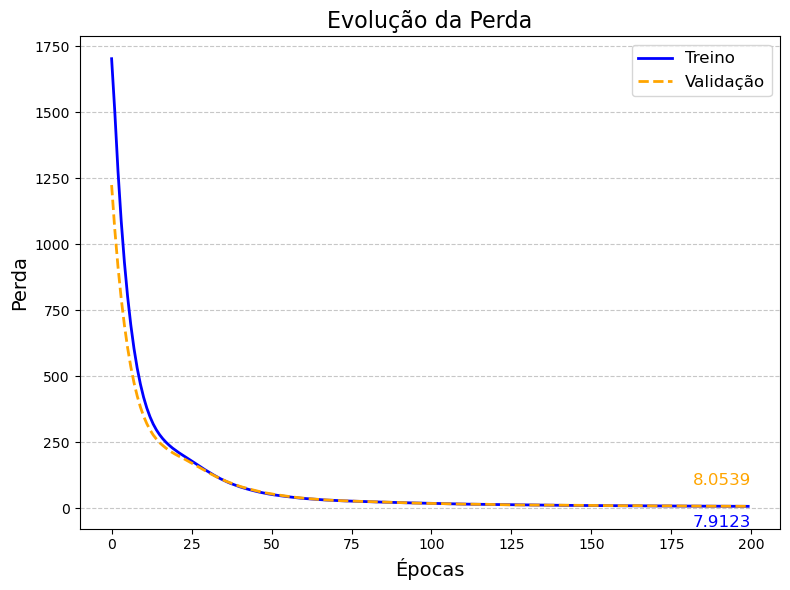

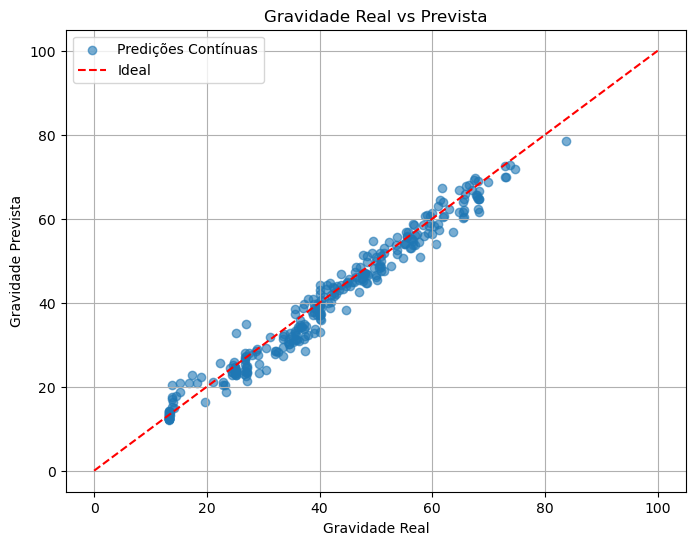

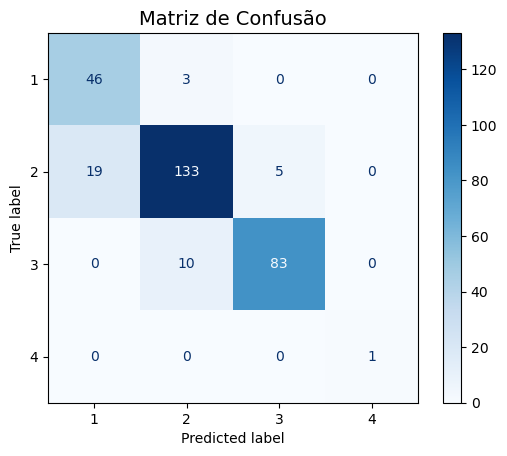

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Função para suavizar curvas com médias móveis
def smooth_curve(values, weight=0.80):
    smoothed = []
    last = values[0]
    for v in values:
        smoothed_val = last * weight + (1 - weight) * v
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

# Gráfico de Perda
plt.figure(figsize=(8, 6))
train_loss = smooth_curve(history.history["loss"])
val_loss = smooth_curve(history.history["val_loss"])
plt.plot(train_loss, label="Treino", linewidth=2, color="blue")
plt.plot(val_loss, label="Validação", linewidth=2, linestyle="--", color="orange")
plt.title("Evolução da Perda", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Perda", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adicionar anotação dos valores finais
plt.annotate(
    f"{train_loss[-1]:.4f}",
    xy=(len(train_loss) - 1, train_loss[-1]),
    xytext=(-40, -15),
    textcoords="offset points",
    fontsize=12,
    color="blue",
)
plt.annotate(
    f"{val_loss[-1]:.4f}",
    xy=(len(val_loss) - 1, val_loss[-1]),
    xytext=(-40, 15),
    textcoords="offset points",
    fontsize=12,
    color="orange",
)

plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_continuous, alpha=0.6, label="Predições Contínuas")
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label="Ideal")
plt.xlabel("Gravidade Real")
plt.ylabel("Gravidade Prevista")
plt.title("Gravidade Real vs Prevista")
plt.legend()
plt.grid()
plt.show()

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Exibir a matriz de confusão com o display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4])

# Plotar a matriz de confusão
disp.plot(cmap="Blues", values_format="d")

# Título e exibição
plt.title("Matriz de Confusão", fontsize=14)
plt.show()
